In [1]:
#pip install wordcloud

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data=pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv")
print(data.head())

                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product üëåüèªüòò       5  
4  Light weight laptop with new amazing features,...       5  


In [26]:
print(data.isnull().sum())

Product_name    0
Review          0
Rating          0
dtype: int64


In [27]:
import nltk
import re
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub(r'\n', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = [word for word in text.split() if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)

 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rohit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
ratings=data["Rating"].value_counts()
numbers=ratings.index
quantity=ratings.values

In [29]:
print(ratings)

Rating
5    1382
4     552
1     184
3     140
2      46
Name: count, dtype: int64


In [30]:
print(numbers)

Index([5, 4, 1, 3, 2], dtype='int64', name='Rating')


In [31]:
print(quantity)

[1382  552  184  140   46]


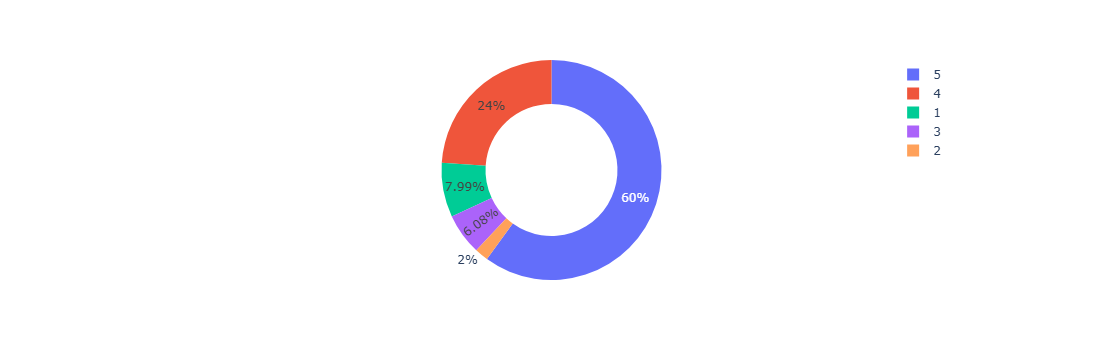

In [32]:
import plotly.express as px
figure=px.pie(data,values=quantity,names=numbers,hole=0.6)
figure.show()

In [33]:
text=" ".join(i for i in data.Review)

In [34]:
text

"best great performancei got around backup bit low thank rapid charger fast display ok price rang decent speaker mani customis optionsvantag softwar good customisationoveral good perform till nowwil updat later problem occur good perfom great perform usual also game laptop issu batteri stand hrs without adapt prefer use adaptor use softwar play game wife happi best product üëåüèªüòò light weight laptop new amaz featur batteri life awesom amaz laptop much happi thank flipkart good laptop person use thank much flipkart amaz product good normal work student onlin class watch movi etcnot havi task game buis work offic workedit etcoveral good laptop rang budget laptop laptop receiv good packag good condit perform wise littl bit slow compar processor intel general usag laptop perform good nice good product dilevari slow affort thousand extra prefer laptop configi came know done limit laptoppoor webcam even suitabl day day onlin classessound low need connect extern speakerskeypad visibl du

In [35]:
sentiments = SentimentIntensityAnalyzer()

data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"]  = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]

data = data[["Review", "Positive", "Negative", "Neutral"]]
data

Review  Positive  Negative  \
0     best great performancei got around backup bit ...     0.395     0.101   
1                                           good perfom     0.744     0.000   
2     great perform usual also game laptop issu batt...     0.277     0.000   
3                           wife happi best product üëåüèªüòò     0.512     0.000   
4     light weight laptop new amaz featur batteri li...     0.000     0.000   
...                                                 ...       ...       ...   
2299              great display accur colour price rang     0.451     0.000   
2300  superb monitor first brought use month bought ...     0.339     0.000   
2301                                             awesom     0.000     0.000   
2302                                     one issu adapt     0.000     0.000   
2303  worth money u spend monitor great deal use cct...     0.458     0.000   

      Neutral  
0       0.504  
1       0.256  
2       0.723  
3       0.488  
4       1.000  
...       ...  
2299    0.549  
2300    0.661  
2301    1.000  
2302    1.000  
2303    0.542  

[2304 rows x 4 columns]

In [36]:
x=sum(data["Positive"])
y=sum(data["Negative"])
z=sum(data["Neutral"])

In [37]:
x

923.553

In [38]:
y

96.775

In [39]:
z

1283.688

In [42]:
def sentiment_score(a,b,c):
    if(a>b) and (a>c):
        print("Positive ")
    elif(b>a) and (b>c):
        print("Negative ")
    else:
        print("Neutral ")
sentiment_score(x,y,z)

Neutral 
